# Projeto Análise de dados de pessoas com Diabetes


### Objetivo deste projeto é visualizar os dados presentes e identificar quaisquer que sejam as anomalias se há dados missing, se existe alguma correlação entre varáveis identificar essas correlações. aplicar técnicas de pré-processamento dos dados.

##### Os dados usados: https://www.kaggle.com/code/priyamchoksi/diabetes-prediction-model

#### Este projeto será divido em 2 etapas
1°- Exploração e visualização dos dados

2°- Pré-processamento dos dados para modelos de machine learning


In [34]:
##IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('diabetes_dataset.csv')


###### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Análise Exploratória


### O conjunto de dados contém informações sobre pacientes, incluindo características demográficas, históricos médicos e medições de saúde. As colunas incluem:
##### year: Ano da coleta de dados.
##### gender: Gênero do paciente.
##### age: Idade do paciente.
##### location: Localização.
##### race: Indicações de raça.
##### hypertension: Se o paciente tem hipertensão.
##### heart_disease: Se o paciente tem doença cardíaca.
##### smoking_history: Histórico de tabagismo.
##### bmi: Índice de Massa Corporal.
##### hbA1c_level: Nível de HbA1c.
##### blood_glucose_level: Nível de glicose no sangue.
##### diabetes: Indicador de diabetes.

In [47]:
#Verificando a quantidade e os tipos de dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [46]:
#Conhecendo os Dados
df.head(10)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
5,2016,Male,66.0,Alabama,0,0,1,0,0,0,0,not current,27.32,5.7,159,0
6,2015,Female,49.0,Alabama,0,0,1,0,0,0,0,current,24.34,5.7,80,0
7,2016,Female,15.0,Alabama,0,0,0,0,1,0,0,No Info,20.98,5.0,155,0
8,2016,Male,51.0,Alabama,1,0,0,0,0,0,0,never,38.14,6.0,100,0
9,2015,Male,42.0,Alabama,0,0,1,0,0,0,0,No Info,27.32,5.7,160,0


In [43]:
#Estatísticas Descritivas de Variavéis numéricas
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [44]:
#Estatísticas Descritivas de Variavéis Categóricas
df.describe(include = object)

,gender,location,smoking_history
count,100000,100000,100000
unique,3,55,6
top,Female,Iowa,No Info
freq,58552,2038,35816


### Resumo variáveis numéricas : 
1 - Essa coleta começou no ano de 2015, o valor mediano dos dados coletados é de 2019 o final da coleta foi em 2022 

2 - Temos um valor mínimo de 0.080000 na idade, iremos tratar esse valor.

3 - Idade media é de 41 anos e a idade máxima 80 anos

4 - Outro fato curioso é que existe um ser com 95.690000 bmi (Índice de massa corporal) foge total do padrão dos dados.

### Resumo variáveis categóricas:  
Existe três categorias (Female, Male e outra(s)).

Location: 55 localizações diferentes, com Iowa sendo a mais frequente.

Smoking_history: Seis categorias, com "No Info" sendo a mais frequente.

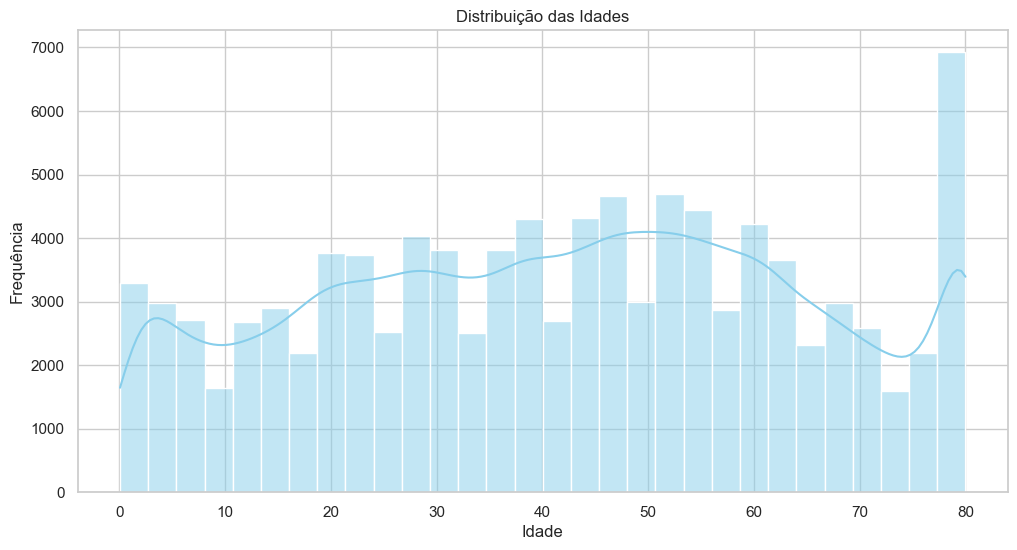

In [27]:
# Configurações de estilo
sns.set(style="whitegrid")

# Distribuição da Idade
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

#### Distribuição das Idades: Mostra que a maioria dos pacientes está concentrada entre 20 e 60 anos
#### com uma pequena quantidade de pacientes mais jovens e mais velhos.

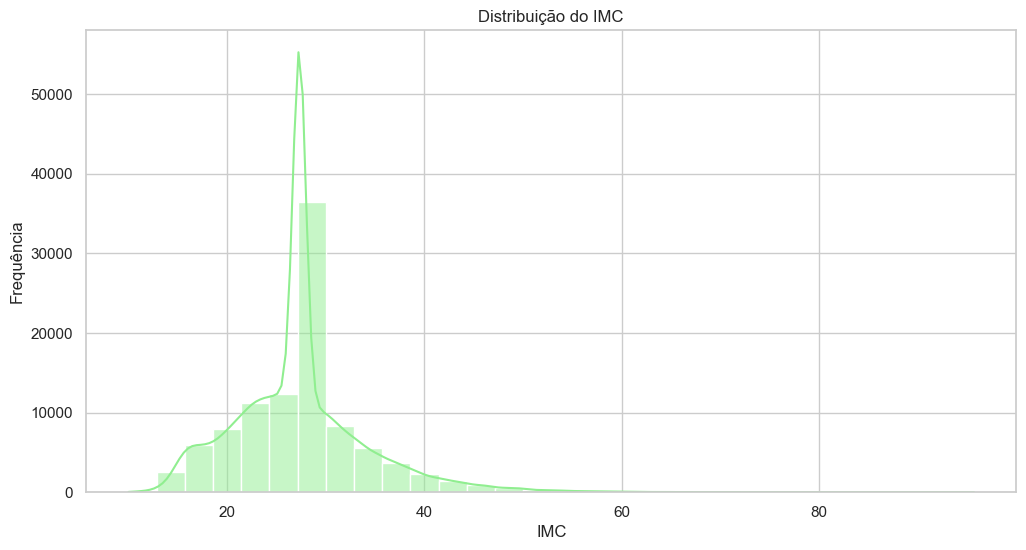

In [28]:
# Distribuição do IMC
plt.figure(figsize=(12, 6))
sns.histplot(df['bmi'], bins=30, kde=True, color='lightgreen')
plt.title('Distribuição do IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.show()


#### Distribuição do IMC: A maioria dos pacientes tem IMC entre 20 e 40, com alguns valores mais extremos.

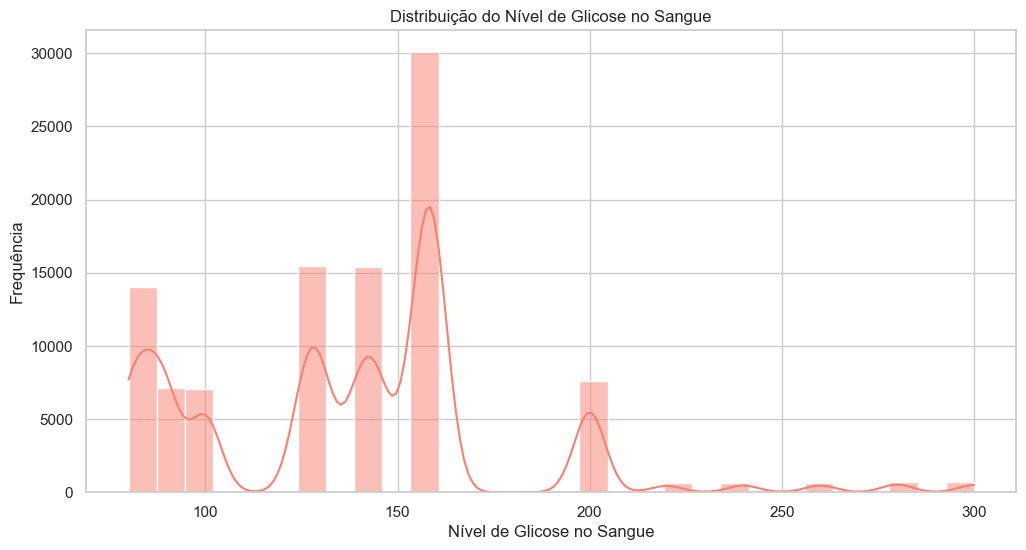

In [29]:
# Distribuição do Nível de Glicose no Sangue
plt.figure(figsize=(12, 6))
sns.histplot(df['blood_glucose_level'], bins=30, kde=True, color='salmon')
plt.title('Distribuição do Nível de Glicose no Sangue')
plt.xlabel('Nível de Glicose no Sangue')
plt.ylabel('Frequência')
plt.show()


#### Distribuição do Nível de Glicose no Sangue: A maioria dos pacientes tem níveis de glicose no sangue entre 80 e 200, com picos ao redor de 100 e 160.

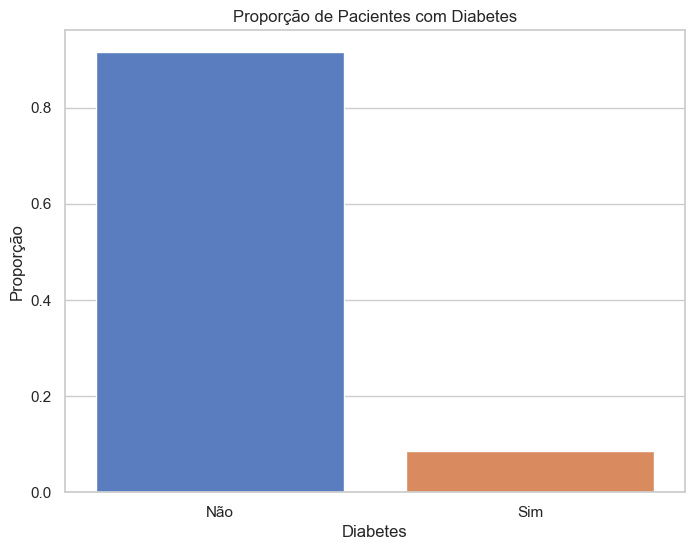

In [30]:
# Calcular a proporção de pacientes com diabetes
diabetes_counts = df['diabetes'].value_counts()
diabetes_proportion = diabetes_counts / len(df)

# Plotar a proporção de pacientes com diabetes
plt.figure(figsize=(8, 6))
sns.barplot(x=diabetes_proportion.index, y=diabetes_proportion.values, palette='muted')
plt.title('Proporção de Pacientes com Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Proporção')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

#### Proporção de Pacientes com Diabetes: Aproximadamente 8,5% dos pacientes têm diabetes, ou seja a maior parte não tem.

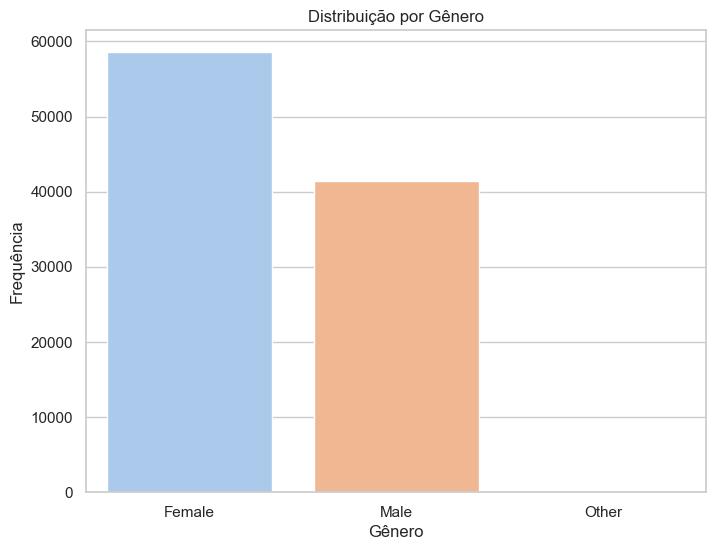

In [31]:
# Distribuição por Gênero
plt.figure(figsize=(8, 6))
sns.countplot(df, x='gender', palette='pastel')
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.show()

#### Distribuição por Gênero: Mostra que há mais pacientes do gênero feminino do que masculino.



#### Verificando a Correlação entre as Variáveis QUANTITATIVAS:


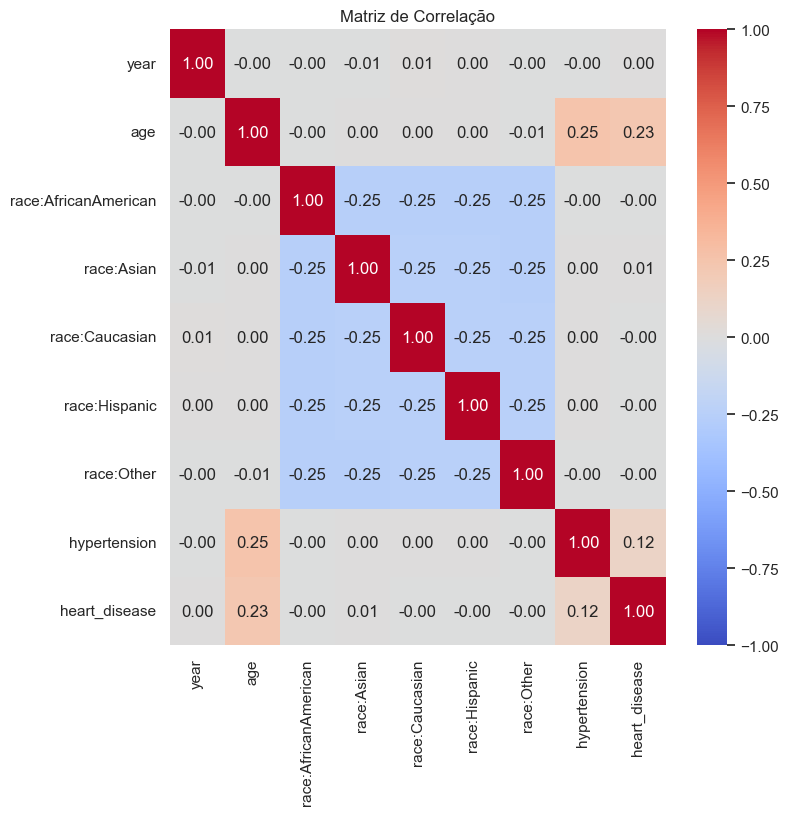

In [56]:
correlation_matrix = df[['year', 'age', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease']].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin = -1, vmax = 1, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

### Observações
Observações específicas da matriz:

1°- age e hypertension: Correlação positiva (0.28), indicando que a hipertensão tende a aumentar com a idade.

2°- age e heart_disease: Correlação positiva (0.31), sugerindo que a prevalência de doenças cardíacas tende a aumentar com a idade.

3°- race:AfricanAmerican e heart_disease: Correlação positiva (0.16), indicando uma leve tendência de que ser afro-americano pode estar associado a uma maior prevalência de doenças cardíacas.

4°- race:Caucasian e hypertension: Correlação negativa (-0.19), sugerindo que ser caucasiano está levemente associado a uma menor prevalência de hipertensão.
### Conclusão
1°- Idade como Fator de Risco: Idade avançada é um fator de risco significativo para hipertensão e doenças cardíacas.

2°- Hipertensão e Doença Cardíaca: Existe uma forte inter-relação, sugerindo que os programas de saúde devem focar na monitorização e tratamento simultâneo dessas condições.

3°- Diferenças Raciais na Saúde: As disparidades na saúde entre diferentes grupos raciais devem ser exploradas mais a fundo para criar políticas de saúde mais equitativas.

4°- Distribuição de Diabetes: Analisar a distribuição de diabetes no contexto de outras variáveis como IMC e nível de glicose é crucial para identificar padrões e causas subjacentes.

### Parte 1 concluída

1. Verificando Valores Missing

In [58]:
# Verificar valores faltantes
missing_values = df.isnull().sum()
missing_values


year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

2. Codificação de Variáveis Categóricas

In [61]:
# Codificação de variáveis categóricas
df = pd.read_csv('diabetes_dataset.csv')
categorical_features = ['gender', 'location']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,...,location_Texas,location_United States,location_Utah,location_Vermont,location_Virgin Islands,location_Virginia,location_Washington,location_West Virginia,location_Wisconsin,location_Wyoming
0,2020,32.0,0,0,0,0,1,0,0,never,...,False,False,False,False,False,False,False,False,False,False
1,2015,29.0,0,1,0,0,0,0,0,never,...,False,False,False,False,False,False,False,False,False,False
2,2015,18.0,0,0,0,0,1,0,0,never,...,False,False,False,False,False,False,False,False,False,False
3,2015,41.0,0,0,1,0,0,0,0,never,...,False,False,False,False,False,False,False,False,False,False
4,2016,52.0,1,0,0,0,0,0,0,never,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,33.0,0,0,0,0,1,0,0,never,...,False,False,False,False,False,False,False,False,False,True
99996,2016,80.0,0,1,0,0,0,0,0,No Info,...,False,False,False,False,False,False,False,False,False,True
99997,2018,46.0,0,1,0,0,0,0,0,ever,...,False,False,False,False,False,False,False,False,False,True
99998,2018,51.0,1,0,0,0,0,0,0,not current,...,False,False,False,False,False,False,False,False,False,True


3. Normalização/Escalonamento python

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['year', 'age', 'bmi', 'hbA1c_level', 'blood_glucose_level']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,...,location_Texas,location_United States,location_Utah,location_Vermont,location_Virgin Islands,location_Virginia,location_Washington,location_West Virginia,location_Wisconsin,location_Wyoming
0,1.218511,-0.439045,0,0,0,0,1,0,0,never,...,False,False,False,False,False,False,False,False,False,False
1,-2.498320,-0.572279,0,1,0,0,0,0,0,never,...,False,False,False,False,False,False,False,False,False,False
2,-2.498320,-1.060805,0,0,0,0,1,0,0,never,...,False,False,False,False,False,False,False,False,False,False
3,-2.498320,-0.039342,0,0,1,0,0,0,0,never,...,False,False,False,False,False,False,False,False,False,False
4,-1.754954,0.449184,1,0,0,0,0,0,0,never,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.268221,-0.394634,0,0,0,0,1,0,0,never,...,False,False,False,False,False,False,False,False,False,True
99996,-1.754954,1.692704,0,1,0,0,0,0,0,No Info,...,False,False,False,False,False,False,False,False,False,True
99997,-0.268221,0.182715,0,1,0,0,0,0,0,ever,...,False,False,False,False,False,False,False,False,False,True
99998,-0.268221,0.404772,1,0,0,0,0,0,0,not current,...,False,False,False,False,False,False,False,False,False,True


4. Divisão em Conjuntos de Treinamento e Teste

In [71]:
from sklearn.model_selection import train_test_split

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Finalizando o Pré-processamento

Após aplicar todas essas etapas, o conjunto de dados estará pronto para ser utilizado em modelos de aprendizado de máquina.